# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [498]:
import sys
sys.path.append('../../src')

In [499]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min

## Data Import

In [500]:
horizon = 1

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [501]:
scales = TemporalScale(discretization_list=[1, 24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [502]:
bigM = 10**4
smallM = 0.001

Hourly electricity prices

In [503]:
#Electricity price is hourly
elec_price_df = pd.read_csv('ERCOT_price.csv')
elec_price_df = elec_price_df[elec_price_df['BusName'] == 'FORMOSA_G8']
elec_price_df = elec_price_df[['LMP']].reset_index(drop = True)

In [504]:
#elec_price_df

Hourly Natural Gas Prices

In [505]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('Naturalgas_price_hourly.csv')
NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
NG_price_df = NG_price_df[['USD/kg']]
#NG_price_df

In [506]:
elec_price = elec_price_df.max()[0]
NG_price = NG_price_df.max()[0]

Hourly Wind availability

In [507]:
# Wind_df = pd.read_csv('Wind2424.csv')
# Wind_df = Wind_df[['ACTUAL_SYSTEM_WIDE']]
# Wind_df = Wind_df[:24]
# #Wind_df

Hourly Solar availability

In [508]:
# Solar_df = pd.read_csv('Solar2424.csv')
# Solar_df = Solar_df[['PVGRPP_SYSTEM_WIDE']]
# Solar_df = Solar_df[:24]
# Solar_df

In [509]:
#Beep

In [510]:
#Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 52.69, gwp=0)

#Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power', price= 60.11, gwp=0)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

GridPower = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', price = elec_price, varying = [VaryingResource.DETERMINISTIC_PRICE], gwp=420.62)

#The following are components of natural gas

CO2 = Resource(name='CO2', basis='kg/hr',
               label='Carbon dioxide', block='Resource')

CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
               label='Carbon dioxide to Stack', block='Resource', gwp = 1)


CO2_Air = Resource(name='CO2 from air', basis='kg/hr',
               label='Carbon dioxide from air', block='Resource', cons_max=bigM)

CO2_Vent = Resource(name='CO2 Vented from the process', basis='kg/hr',
               label='Carbon dioxide vented from the process', block='Resource', gwp = 1, sell=True)

CO2cpt = Resource(name='CO2 Captured', basis='kg/hr', sell=True, label='Captured carbon dioxide', block='Resource')

CH4 = Resource(name='CH4', basis='kg/hr',
               label='Methane', block='Resource')

#Important: Natural gas consists over different components

NG = Resource(name='Natural Gas', basis='kg/hr',
                     cons_max=bigM, label='Natural Gas', gwp = 0.660979, price = NG_price, varying = [VaryingResource.DETERMINISTIC_PRICE])


# Hydrogen is what I want to sell/satisfy a specific demand for

H2 = Resource(name='Hydrogen', basis='kg/hr', label='Hydrogen', block='Resource')

H2Pure = Resource(name='Pure Hydrogen', demand = True, basis='kg/hr', label='Pure Hydrogen', block='Resource')

# Water is required for the electrolysis process

H2O = Resource(name='H2O',
               basis='kg/hr', label='Water', block='Resource')

#Industrial water price is 0.002 USD/kg of water
H2OFresh = Resource(name="H2O Fresh", cons_max=bigM, price = 0.002, basis='kg/hr', label='Fresh Water', block='Resource')

H2O_Air = Resource(name='H2O from air', cons_max=bigM,
               basis='kg/hr', label='Water from air', block='Resource')

H2O_Vent = Resource(name='H2O vented from the process',
               basis='kg/hr', sell=True, label='Water vented from the process', block='Resource')


H2O_Stack = Resource(name='H2O to Stack',
               basis='kg/hr', sell= True, label='Water to Stack', block='Resource')

# Air components

N2 = Resource(name='N2', basis='kg/hr',
               label='Nitrogen', block='Resource')

N2_SMR = Resource(name='N2 from SMR', basis='kg/hr',
               label='Nitrogen from SMR', block='Resource')

N2_WGS = Resource(name='N2 from WGS', basis='kg/hr',
               label='Nitrogen from WGS', block='Resource')

N2_FG = Resource(name='N2 from FG', basis='kg/hr',
               label='Nitrogen from FG', block='Resource')

N2_Air = Resource(name='N2 from Air', basis='kg/hr', cons_max= bigM,
               label='Nitrogen from Air', block='Resource')

N2_Vent = Resource(name='N2 vented from the process', basis='kg/hr', sell= True,
               label='Nitrogen vented from the process', block='Resource')

N2Prod = Resource(name='N2 in product stream', basis='kg/hr',
               label='Nitrogen in product stream', block='Resource')

N2_Stack = Resource(name='N2 to Stack', basis='kg/hr', sell= True,
               label='Nitrogen to stack', block='Resource')

O2 = Resource(name='O2', basis='kg/hr',
               label='Oxygen', block='Resource')

O2_Air = Resource(name='O2 from air', basis='kg/hr',
               label='Oxygen from air', block='Resource', cons_max = bigM)

O2_Vent = Resource(name='O2 vented from the process', basis='kg/hr', sell=True,
               label='Oxygen vented from the process', block='Resource')

O2_Stack = Resource(name='O2 to Stack', basis='kg/hr', sell= True,
               label='Oxygen to Stack', block='Resource')


## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [511]:
'''Do I understand it correctly that I will have no material modes'''

'Do I understand it correctly that I will have no material modes'

## Declare Processes

In [512]:
#STORAGE PROCESSES
# Reference for Li capex - Doi
# LiI = Process(name='LiI', conversion= {'Brine': {Power: -1, LiIPower: 1}, 'Rock': {Power: -1, LiIPower: 1}}, 
            #   material_cons={'Brine': {LiB: 20}, 'Rock': {LiR: 20}}, capex={'Brine': 1302182, 'Rock': 1302182}, 
            #   fopex={'Brine': 41432, 'Rock':41432}, vopex={'Brine': 2000, 'Rock': 2000}, 
            #   prod_min=smallM, prod_max=bigM, label='Lithium-ion battery', basis='MW')

# LiI_discharge = Process(name='LiI_d', conversion={'A': {Power: 0.8, LiIPower: -1}}, capex={'A': smallM},
                        # fopex={'A': smallM}, vopex={'A': smallM}, prod_max=bigM, prod_min=smallM,  
                        # label='Lithium-ion battery (d)', basis='MW', material_cons= {'A': {Dummy: 0}})

# I can impliment different PV purchasing prices
# PV = Process(name='PV', conversion={'Mo':{Solar: -5, Power: 1}, 'Po': {Solar: -6.67, Power: 1}}, 
#                  prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW', block = 'power')
# # I can impliment different WF purchasing prices
# WF = Process(name='WF', conversion={'WF_L':{Wind: -2.857, Power: 1}, 'WF_O': {Wind: -2.3255, Power: 1}}, 
#                 prod_min=smallM, prod_max=bigM, varying=[VaryingProcess.DETERMINISTIC_CAPACITY], label='Wind farm', basis='MW', block = 'power')

# '''Purchasing electricity from a traditional power production system'''

Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1},prod_min=smallM, prod_max=100, label='Grid', basis='MW')

# PV = Process(name='PV', conversion={Solar: -1, Power: 1},
#              prod_max=100, prod_min=0,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

# capex=0.0001, fopex=0.0001, vopex=0.0001, gwp = 0.0001

# WF = Process(name='WF', conversion={Wind: -1, Power: 1},
#              prod_max=100, prod_min=0, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')

# '''1.) Solar option energy production purchasing
#    2.) Wind energy production purchasing
#    3.) Grid energy purchasing'''

# # '''Steam-methane reforming system'''
# # I took out the GWP = 0.0001

# prod_max = {0: 20, 1: 60, 2: 100}
# prod_min = {0: 0, 1: 20, 2: 60}
# rate_max = {0: 20, 1: 30, 2: 20}
# mode_ramp = {(0,1): 1, (1,2): 1}

SMR = Process(name='SMR', conversion={Power: -0.00065, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
                                            H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}, capex=0.0001,
               vopex=1.2, fopex=0.001, prod_min=smallM, prod_max=200, label='SMR', basis='kg/hr')


# SMR = Process(name='SMR', conversion={0:{Power: -0.00065*2, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
#                                             H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}, 
#                                             1: {Power: -0.00065*1.5, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
#                                             H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434},
#                                             2: {Power: -0.00065, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
#                                             H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}}
#                                             , capex=0.0001,
#                vopex=1.2, fopex=0.001, prod_min=prod_min, prod_max=prod_max, rate_max = rate_max, mode_ramp = mode_ramp, label='SMR', basis='kg/hr')

SMRCCS = Process(name='SMRCCS', conversion={Power: -0.00139, N2_Air: -22.2315, O2_Air: -6.811924, H2O_Air: -0.183055, CO2_Air: -0.013551, CO2_Stack: -9.3713,
                                             H2O_Vent: 3.826767, CO2cpt: 8.903, CO2_Vent: 0.46856, H2O_Stack: 0.558114, N2_Stack: 22.32218, O2_Stack: 0.6203032, }, capex=0.0001,
                vopex=1.1, fopex=0.001, prod_min=smallM, prod_max=bigM, label='SMRCCS', basis='kg/hr')

PEM = Process(name='PEM', conversion={Power: -0.157828499, H2OFresh: -7.568707483,
                                            H2Pure: 1}, capex=0.0001,
               vopex=4.668, fopex=0.001, prod_min=smallM, prod_max=bigM, label='PEM', basis='kg/hr')


## Declare Location

In [513]:
process_set = {Grid, SMR, SMRCCS, PEM}#, SMRCCS, PEM} #Grid,

In [514]:
houston = Location(name='HO', processes=process_set, capacity_factor={PV: Solar_df, WF: Wind_df}, price_factor={GridPower: elec_price_df, NG: NG_price_df}, 
                   scales=scales, label='Houston', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1, capacity_scale_level=1)

#capacity_factor={GridPower[:8760*horizon]},
#capacity_scale_level=2, 

## Declare Scenario

In [515]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=0, demand_scale_level=0, 
                    purchase_scale_level = 1, scheduling_scale_level=1, network_scale_level=0, capacity_scale_level=1,
                    label='full_case', demand={houston: { H2Pure: 500}})

# expenditure_scale_level=0, scheduling_scale_level=2,
#                     network_scale_level=0, 


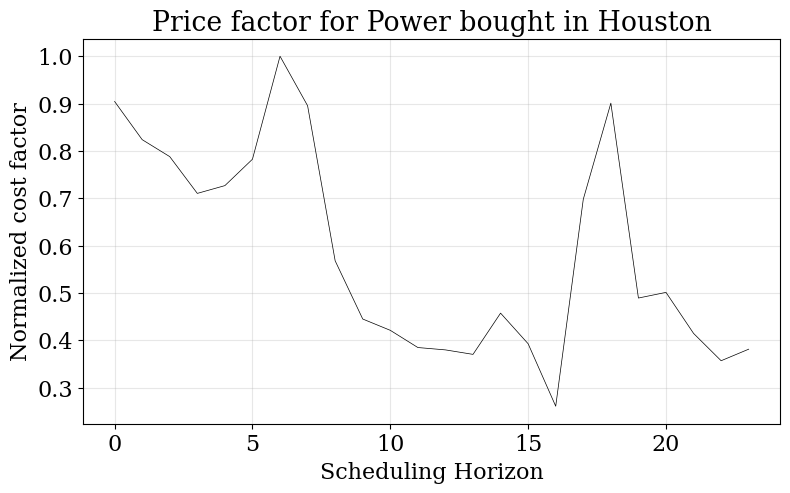

In [516]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=GridPower, fig_size=(9, 5), color='black')


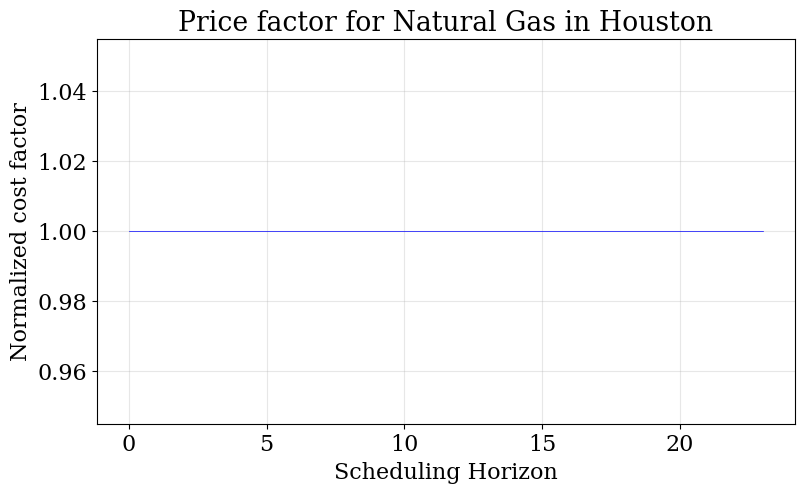

In [517]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=NG, fig_size=(9, 5), color='blue')

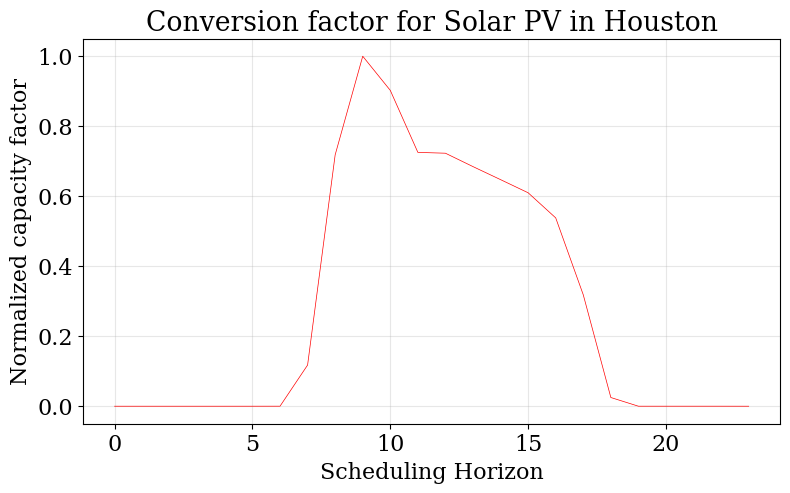

In [518]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='red')

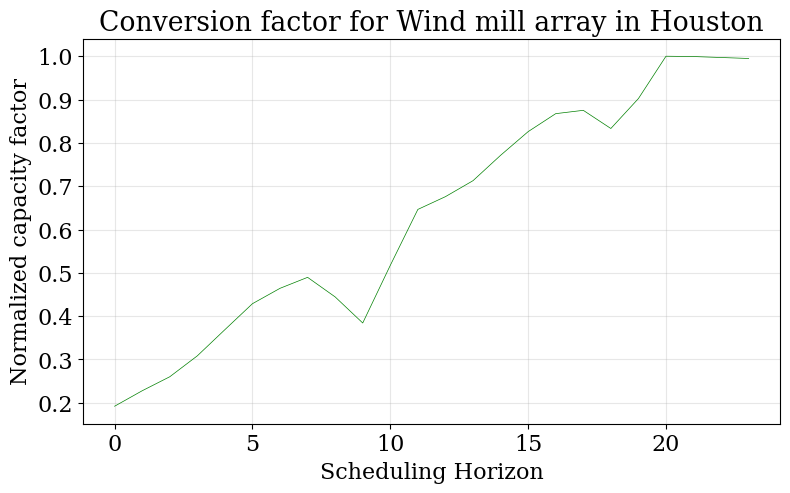

In [519]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=WF, fig_size=(9, 5), color='green')

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [520]:

#milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE,
 #                                                     Constraints.TRANSPORT, Constraints.NETWORK, Constraints.EMISSION, Constraints.MATERIAL}, objective=Objective.COST)
# milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
#                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

#, Constraints.MODE

milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [521]:
scales.scale_iter(2)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23)]

In [522]:
# model.component

from pyomo.environ import ConstraintList
milp_cost.cons1 = ConstraintList()
for i in scales.scale_iter(2):
    milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 5)

In [523]:
milp_cost.cons1.pprint()

cons1 : Size=24, Index=cons1_index, Active=True
    Key : Lower : Body           : Upper : Active
      1 :   5.0 :  P[HO,SMR,0,0] :  +Inf :   True
      2 :   5.0 :  P[HO,SMR,0,1] :  +Inf :   True
      3 :   5.0 :  P[HO,SMR,0,2] :  +Inf :   True
      4 :   5.0 :  P[HO,SMR,0,3] :  +Inf :   True
      5 :   5.0 :  P[HO,SMR,0,4] :  +Inf :   True
      6 :   5.0 :  P[HO,SMR,0,5] :  +Inf :   True
      7 :   5.0 :  P[HO,SMR,0,6] :  +Inf :   True
      8 :   5.0 :  P[HO,SMR,0,7] :  +Inf :   True
      9 :   5.0 :  P[HO,SMR,0,8] :  +Inf :   True
     10 :   5.0 :  P[HO,SMR,0,9] :  +Inf :   True
     11 :   5.0 : P[HO,SMR,0,10] :  +Inf :   True
     12 :   5.0 : P[HO,SMR,0,11] :  +Inf :   True
     13 :   5.0 : P[HO,SMR,0,12] :  +Inf :   True
     14 :   5.0 : P[HO,SMR,0,13] :  +Inf :   True
     15 :   5.0 : P[HO,SMR,0,14] :  +Inf :   True
     16 :   5.0 : P[HO,SMR,0,15] :  +Inf :   True
     17 :   5.0 : P[HO,SMR,0,16] :  +Inf :   True
     18 :   5.0 : P[HO,SMR,0,17] :  +Inf :   True
  

In [524]:
# from pyomo.environ import *

# # # Create a Concrete Model

# # Define the set of time periods
# for i in scales.scale_iter(2):
#     milp_cost.Time = Set(initialize=[*i])

# # Variable representing power output at each time period
# milp_cost.production = Var(milp_cost.Time, domain=NonNegativeReals)

# # Ramping limit
# ramp_limit = 10  # This is an example value, you should adjust it as needed

# # Define the ramping constraint
# def ramping_constraint_rule(milp_cost, t):
#     if t == milp_cost.Time.first():  # No ramping constraint for the first time period
#         return Constraint.Skip
#     else:
#         return milp_cost.power[t] - milp_cost.power[t-1] <= ramp_limit

# milp_cost.ramping_constraint = Constraint(milp_cost.Time, rule=ramping_constraint_rule)

# # model.component

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_cost.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


In [525]:
#This is how we can do a ramping rate by pulling back one time unit on the scales.scale variable
# scales.scale_iter(1).index((0,5)) - 1 

In [526]:
#Another example
# i = (0,2)
# scales.scale_iter(1)[scales.scale_iter(1).index(i) - 1 ]

In [527]:
milp_cost.cons2.pprint()

cons2 : Size=23, Index=cons2_index, Active=True
    Key : Lower : Body                            : Upper : Active
      1 :  -Inf :   P[HO,SMR,0,1] - P[HO,SMR,0,0] :   3.0 :   True
      2 :  -Inf :   P[HO,SMR,0,2] - P[HO,SMR,0,1] :   3.0 :   True
      3 :  -Inf :   P[HO,SMR,0,3] - P[HO,SMR,0,2] :   3.0 :   True
      4 :  -Inf :   P[HO,SMR,0,4] - P[HO,SMR,0,3] :   3.0 :   True
      5 :  -Inf :   P[HO,SMR,0,5] - P[HO,SMR,0,4] :   3.0 :   True
      6 :  -Inf :   P[HO,SMR,0,6] - P[HO,SMR,0,5] :   3.0 :   True
      7 :  -Inf :   P[HO,SMR,0,7] - P[HO,SMR,0,6] :   3.0 :   True
      8 :  -Inf :   P[HO,SMR,0,8] - P[HO,SMR,0,7] :   3.0 :   True
      9 :  -Inf :   P[HO,SMR,0,9] - P[HO,SMR,0,8] :   3.0 :   True
     10 :  -Inf :  P[HO,SMR,0,10] - P[HO,SMR,0,9] :   3.0 :   True
     11 :  -Inf : P[HO,SMR,0,11] - P[HO,SMR,0,10] :   3.0 :   True
     12 :  -Inf : P[HO,SMR,0,12] - P[HO,SMR,0,11] :   3.0 :   True
     13 :  -Inf : P[HO,SMR,0,13] - P[HO,SMR,0,12] :   3.0 :   True
     14 :  -In

In [528]:
scales.scale_iter(2)[scales.scale_iter(2).index((0,1)) - 1]

(0, 0)

In [529]:
#milp_cost.cons2.pprint()

In [530]:
# from pyomo.environ import Constraintlist

# # Create a Concrete Model
# milp_cost = ConcreteModel()

# # Define the set of time periods
# milp_cost.Time = Set(initialize=[1, 2, 3, 4, 5])

# # Variable representing power output at each time period
# milp_cost.power = Var(milp_cost.Time, domain=NonNegativeReals)

# # Ramping limit
# ramp_limit = 10  # This is an example value, you should adjust it as needed

# # Define the ramping constraint
# def ramping_rule(milp_cost, t):
#     if t == milp_cost.Time.first():  # No ramping constraint for the first time period
#         return Constraint.Skip
#     else:
#         return milp_cost.power[t] - milp_cost.power[t-1] <= ramp_limit

# milp_cost.ramping_constraint = Constraint(milp_cost.Time, rule=ramping_rule)

In [531]:
#milp_cost.constraint_nameplate_production_certain_capacity.pprint()

In [532]:
#milp_cost.constraint_co2 = constraint_specific_network_discharge(instance = milp_cost, bounds= {CO2_Vent: 1.4380842167269212*0.8}, network_scale_level = 0)


## Optimize to maximize resource discharge

In [533]:
# results_demand = solve(scenario=scenario, instance=milp_demand,
#                        solver='gurobi', name=f"results_demand", print_solversteps=True)


## Optimize to minimize cost

In [534]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"res_cost", print_solversteps=True, saveformat = '.pkl')


Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1224 rows, 1263 columns and 3138 nonzeros
Model fingerprint: 0x7b2fca6a
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1150 rows and 1212 columns
Presolve time: 0.00s
Presolved: 74 rows, 51 columns, 194 nonzeros
Variable types: 50 continuous, 1 integer (1 binary)
Found heuristic solution: objective 830.4485869

Root relaxation: cutoff, 20 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0

In [535]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0}

In [536]:
results_cost.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.007628947368421051,
 ('HO', 'Grid', 0, 8): 0.009578947368421051,
 ('HO', 'Grid', 0, 9): 0.011528947368421052,
 ('HO', 'Grid', 0, 10): 0.01347894736842105,
 ('HO', 'Grid', 0, 11): 0.01542894736842105,
 ('HO', 'Grid', 0, 12): 0.017378947368421053,
 ('HO', 'Grid', 0, 13): 0.019328947368421053,
 ('HO', 'Grid', 0, 14): 0.02127894736842105,
 ('HO', 'Grid', 0, 15): 0.02322894736842105,
 ('HO', 'Grid', 0, 16): 0.025178947368421047,
 ('HO', 'Grid', 0, 17): 0.013478947368421049,
 ('HO', 'Grid', 0, 18): 0.015428947368421052,
 ('HO', 'Grid', 0, 19): 0.01737894736842105,
 ('HO', 'Grid', 0, 20): 0.019328947368421053,
 ('HO', 'Grid', 0, 21): 0.02127894736842105,
 ('HO', 'Grid', 0, 22): 0.023228947368421054,
 ('HO', '

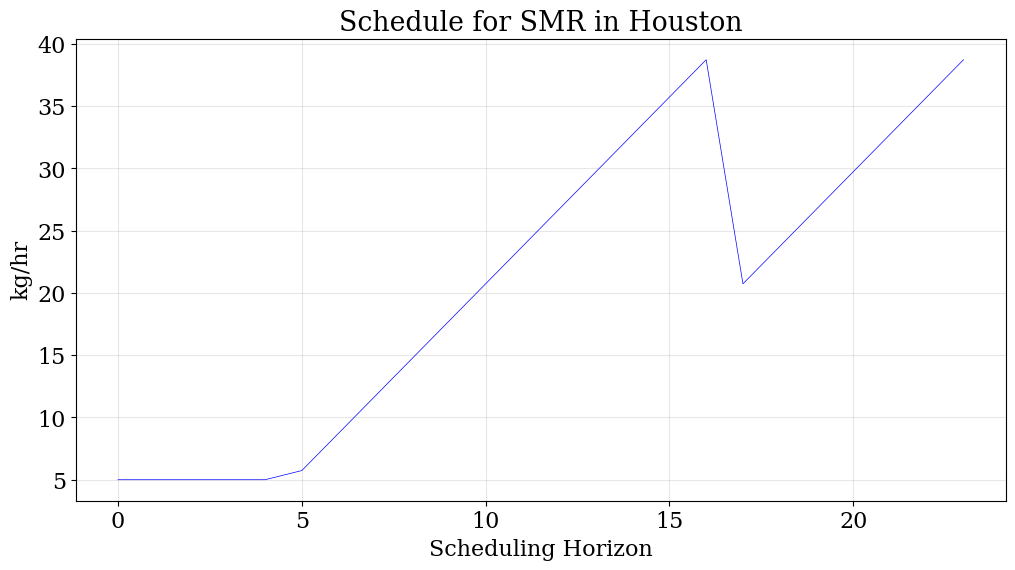

In [537]:
plot_results.schedule(results = results_cost, y_axis= 'P', component = 'SMR', location='HO')

In [538]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 0.0,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4685.65,
 ('HO', 'GridPower', 0): 136.70149999999998,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [539]:
results_cost.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.007628947368421051,
 ('HO', 'Grid', 0, 8): 0.009578947368421051,
 ('HO', 'Grid', 0, 9): 0.011528947368421052,
 ('HO', 'Grid', 0, 10): 0.01347894736842105,
 ('HO', 'Grid', 0, 11): 0.01542894736842105,
 ('HO', 'Grid', 0, 12): 0.017378947368421053,
 ('HO', 'Grid', 0, 13): 0.019328947368421053,
 ('HO', 'Grid', 0, 14): 0.02127894736842105,
 ('HO', 'Grid', 0, 15): 0.02322894736842105,
 ('HO', 'Grid', 0, 16): 0.025178947368421047,
 ('HO', 'Grid', 0, 17): 0.013478947368421049,
 ('HO', 'Grid', 0, 18): 0.015428947368421052,
 ('HO', 'Grid', 0, 19): 0.01737894736842105,
 ('HO', 'Grid', 0, 20): 0.019328947368421053,
 ('HO', 'Grid', 0, 21): 0.02127894736842105,
 ('HO', 'Grid', 0, 22): 0.023228947368421054,
 ('HO', '

In [540]:

data = results_cost.output['P']

In [541]:
df = pd.DataFrame(data,index=[0])

In [542]:
df

HO                                                                     
      Grid                                                                     
         0                                                                     
        0        1        2        3        4         5         6         7    
0  0.00325  0.00325  0.00325  0.00325  0.00325  0.003729  0.005679  0.007629  \

                       ...                                                      
                       ... SMRCCS                                               
                       ...      0                                               
         8         9   ...     14   15   16   17   18   19   20   21   22   23  
0  0.009579  0.011529  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 96 columns]

In [543]:
df=df.T

In [544]:
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostprod.xlsx', index=True)

In [545]:
milp_cost.constraint_inventory_balance.pprint()

constraint_inventory_balance : mass balance across scheduling scale
    Size=384, Index=constraint_inventory_balance_index, Active=True
    Key                                          : Lower : Body                                                                                                              : Upper : Active
                    ('HO', 'CO2 Captured', 0, 0) :   0.0 :                                                               8.903*P_m[HO,SMRCCS,0,0,0] - S[HO,CO2 Captured,0,0] :   0.0 :   True
                    ('HO', 'CO2 Captured', 0, 1) :   0.0 :                                                               8.903*P_m[HO,SMRCCS,0,0,1] - S[HO,CO2 Captured,0,1] :   0.0 :   True
                    ('HO', 'CO2 Captured', 0, 2) :   0.0 :                                                               8.903*P_m[HO,SMRCCS,0,0,2] - S[HO,CO2 Captured,0,2] :   0.0 :   True
                    ('HO', 'CO2 Captured', 0, 3) :   0.0 :                                              

In [546]:
#scenario.make_conversion_df()

In [547]:
#print(scenario.make_conversion_df())

In [548]:
results_cost.output['objective']

830.4485869096605

In [549]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0}

In [550]:
# plot_results.cost(results=results_cost, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [551]:
results_cost.output['global_warming_potential_location']

{('HO', 0): 5990.6943450154995}

In [552]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0}

In [553]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 0.0,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4685.65,
 ('HO', 'GridPower', 0): 136.70149999999998,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [554]:
results_cost.output['global_warming_potential_process']

{('HO', 'Grid', 0): 0.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 0.0,
 ('HO', 'SMRCCS', 0): 0.0}

In [555]:
results_cost.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): -0.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 0.0}

In [556]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [557]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons1.add(expr = milp_gwp.P['HO', 'PEM', *i] - milp_gwp.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


In [558]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

In [559]:
# model.component

from pyomo.environ import ConstraintList
milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMRCCS', *i] >= 5)

In [560]:
milp_gwp.constraint_resource_purchase_varying.pprint()

constraint_resource_purchase_varying : calculates varying amount spent on resource consumption
    Size=48, Index=constraint_resource_purchase_varying_index, Active=True
    Key                          : Lower : Body                                                          : Upper : Active
       ('HO', 'GridPower', 0, 0) :   0.0 :               B[HO,GridPower,0,0] - 18.16*C[HO,GridPower,0,0] :   0.0 :   True
       ('HO', 'GridPower', 0, 1) :   0.0 :               B[HO,GridPower,0,1] - 16.54*C[HO,GridPower,0,1] :   0.0 :   True
       ('HO', 'GridPower', 0, 2) :   0.0 :               B[HO,GridPower,0,2] - 15.82*C[HO,GridPower,0,2] :   0.0 :   True
       ('HO', 'GridPower', 0, 3) :   0.0 :               B[HO,GridPower,0,3] - 14.26*C[HO,GridPower,0,3] :   0.0 :   True
       ('HO', 'GridPower', 0, 4) :   0.0 :               B[HO,GridPower,0,4] - 14.59*C[HO,GridPower,0,4] :   0.0 :   True
       ('HO', 'GridPower', 0, 5) :   0.0 :               B[HO,GridPower,0,5] - 15.71*C[HO,GridPowe

In [561]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1248 rows, 1263 columns and 3196 nonzeros
Model fingerprint: 0xc6ac68b3
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1224 rows and 1238 columns
Presolve time: 0.01s
Presolved: 24 rows, 25 columns, 71 nonzeros
Variable types: 25 continuous, 0 integer (0 binary)

Root relaxation: objective 1.831655e+03, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1831.65

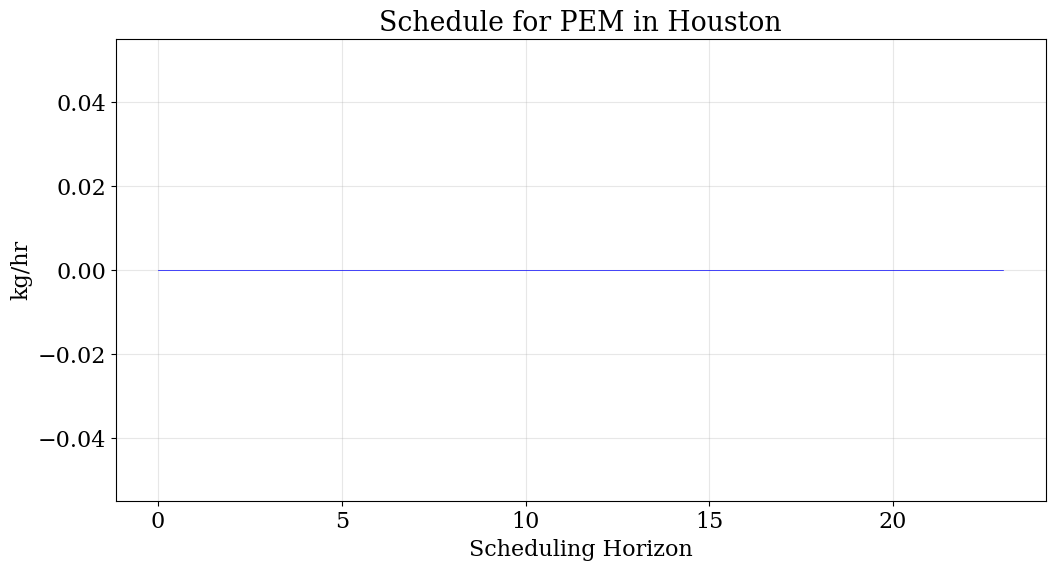

In [562]:
plot_results.schedule(results = results_gwp, y_axis= 'P', component = 'PEM', location='HO')

In [563]:
results_gwp.output['Cost']

{None: 1413.1547518728182}

In [564]:
results_gwp.output['P']

{('HO', 'Grid', 0, 0): 0.40800000000000003,
 ('HO', 'Grid', 0, 1): 0.010199999999999768,
 ('HO', 'Grid', 0, 2): 0.010199999999999768,
 ('HO', 'Grid', 0, 3): 0.010199999999999768,
 ('HO', 'Grid', 0, 4): 0.010199999999999768,
 ('HO', 'Grid', 0, 5): 0.010199999999999768,
 ('HO', 'Grid', 0, 6): 0.010199999999999768,
 ('HO', 'Grid', 0, 7): 0.010199999999999768,
 ('HO', 'Grid', 0, 8): 0.010199999999999768,
 ('HO', 'Grid', 0, 9): 0.010199999999999768,
 ('HO', 'Grid', 0, 10): 0.010199999999999768,
 ('HO', 'Grid', 0, 11): 0.010199999999999767,
 ('HO', 'Grid', 0, 12): 0.010199999999999768,
 ('HO', 'Grid', 0, 13): 0.013909090909091162,
 ('HO', 'Grid', 0, 14): 0.02002909090909116,
 ('HO', 'Grid', 0, 15): 0.02614909090909116,
 ('HO', 'Grid', 0, 16): 0.032269090909091164,
 ('HO', 'Grid', 0, 17): 0.03838909090909116,
 ('HO', 'Grid', 0, 18): 0.04450909090909116,
 ('HO', 'Grid', 0, 19): 0.05062909090909116,
 ('HO', 'Grid', 0, 20): 0.05674909090909116,
 ('HO', 'Grid', 0, 21): 0.06286909090909117,
 ('HO'

In [565]:
# data = results_gwp.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod.xlsx', index=True)

In [566]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0}

In [567]:
results_gwp.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 10000.0,
 ('HO', 'SMR', 0): 200.0,
 ('HO', 'SMRCCS', 0): 10000.0}

In [568]:
help('Cap_P')

No Python documentation found for 'Cap_P'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [569]:
milp_gwp.constraint_global_warming_potential_resource.pprint()

constraint_global_warming_potential_resource : global warming potential for the each resource
    Size=16, Index=constraint_global_warming_potential_resource_index, Active=True
    Key                                      : Lower : Body                                                                                                                                                : Upper : Active
                   ('HO', 'CO2 Captured', 0) :   0.0 :                               global_warming_potential_resource[HO,CO2 Captured,0] - global_warming_potential_resource_discharge[HO,CO2 Captured,0] :   0.0 :   True
    ('HO', 'CO2 Vented from the process', 0) :   0.0 : global_warming_potential_resource[HO,CO2 Vented from the process,0] - global_warming_potential_resource_discharge[HO,CO2 Vented from the process,0] :   0.0 :   True
                   ('HO', 'CO2 from air', 0) :   0.0 :                             global_warming_potential_resource[HO,CO2 from air,0] - global_warming_potential_

In [570]:
scenario.resource_gwp_dict

{'HO': {'GridPower': 420.62,
  'CO2 Captured': 0,
  'H2O from air': 0,
  'N2 to Stack': 0,
  'H2O Fresh': 0,
  'H2O to Stack': 0,
  'Natural Gas': 0.660979,
  'CO2 from air': 0,
  'H2O vented from the process': 0,
  'CO2 Vented from the process': 1,
  'Pure Hydrogen': 0,
  'O2 to Stack': 0,
  'Power': 0,
  'CO2 to Stack': 1,
  'O2 from air': 0,
  'N2 from Air': 0}}

In [571]:
results_gwp.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): 1.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 1.0}

In [572]:
results_cost.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): -0.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 0.0}

In [573]:
results_gwp.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 10000.0,
 ('HO', 'SMR', 0): 200.0,
 ('HO', 'SMRCCS', 0): 10000.0}

In [574]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0}

In [575]:
results_gwp.output['Capex_network']

{0: 2.02}

In [576]:
results_gwp.output['Fopex_network']

{0: 20.2}

In [577]:
results_gwp.output['Vopex_network']

{0: 1149.9999999999998}

In [578]:
results_gwp.output['B_network']

{('CO2 from air', 0): 0.0,
 ('GridPower', 0): 13.696825199999989,
 ('H2O Fresh', 0): 16.78877421,
 ('H2O from air', 0): 0.0,
 ('N2 from Air', 0): 0.0,
 ('Natural Gas', 0): 210.44915246281846,
 ('O2 from air', 0): 0.0}

In [579]:
results_cost.output['B_network']

{('CO2 from air', 0): 0.0,
 ('GridPower', 0): 3.168049710526316,
 ('H2O Fresh', 0): 16.78877421,
 ('H2O from air', 0): 0.0,
 ('N2 from Air', 0): 0.0,
 ('Natural Gas', 0): 210.44915246281846,
 ('O2 from air', 0): 0.0}

In [580]:
results_cost.output['C_network']

{('CO2 from air', 0): 5.8549999999999995,
 ('GridPower', 0): 0.32499999999999996,
 ('H2O Fresh', 0): 8394.387105,
 ('H2O from air', 0): 79.1,
 ('N2 from Air', 0): 9606.7,
 ('Natural Gas', 0): 1767.5945000000002,
 ('O2 from air', 0): 2943.58}

In [581]:
results_cost.output['P']['HO','SMR',0,0]

5.0

In [582]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

[(('HO', 'SMR', 0, 0), 5.0), (('HO', 'SMR', 0, 1), 5.0), (('HO', 'SMR', 0, 2), 5.0), (('HO', 'SMR', 0, 3), 5.0), (('HO', 'SMR', 0, 4), 5.0), (('HO', 'SMR', 0, 5), 5.7368421052631575), (('HO', 'SMR', 0, 6), 8.736842105263158), (('HO', 'SMR', 0, 7), 11.736842105263158), (('HO', 'SMR', 0, 8), 14.736842105263158), (('HO', 'SMR', 0, 9), 17.736842105263158), (('HO', 'SMR', 0, 10), 20.736842105263158), (('HO', 'SMR', 0, 11), 23.736842105263158), (('HO', 'SMR', 0, 12), 26.736842105263158), (('HO', 'SMR', 0, 13), 29.736842105263158), (('HO', 'SMR', 0, 14), 32.73684210526316), (('HO', 'SMR', 0, 15), 35.73684210526316), (('HO', 'SMR', 0, 16), 38.73684210526316), (('HO', 'SMR', 0, 17), 20.736842105263154), (('HO', 'SMR', 0, 18), 23.736842105263158), (('HO', 'SMR', 0, 19), 26.736842105263158), (('HO', 'SMR', 0, 20), 29.736842105263158), (('HO', 'SMR', 0, 21), 32.73684210526316), (('HO', 'SMR', 0, 22), 35.73684210526316), (('HO', 'SMR', 0, 23), 38.73684210526316)]


In [583]:
[results_cost.output['P'][('HO', 'SMR', *i)] for i in scales.scale_iter(2)]

[5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.7368421052631575,
 8.736842105263158,
 11.736842105263158,
 14.736842105263158,
 17.736842105263158,
 20.736842105263158,
 23.736842105263158,
 26.736842105263158,
 29.736842105263158,
 32.73684210526316,
 35.73684210526316,
 38.73684210526316,
 20.736842105263154,
 23.736842105263158,
 26.736842105263158,
 29.736842105263158,
 32.73684210526316,
 35.73684210526316,
 38.73684210526316]

In [584]:
results_cost.output['C']

{('HO', 'CO2 from air', 0, 0): 0.05855,
 ('HO', 'CO2 from air', 0, 1): 0.05855,
 ('HO', 'CO2 from air', 0, 2): 0.05855,
 ('HO', 'CO2 from air', 0, 3): 0.05855,
 ('HO', 'CO2 from air', 0, 4): 0.05855,
 ('HO', 'CO2 from air', 0, 5): 0.06717842105263157,
 ('HO', 'CO2 from air', 0, 6): 0.10230842105263158,
 ('HO', 'CO2 from air', 0, 7): 0.13743842105263157,
 ('HO', 'CO2 from air', 0, 8): 0.17256842105263157,
 ('HO', 'CO2 from air', 0, 9): 0.20769842105263156,
 ('HO', 'CO2 from air', 0, 10): 0.24282842105263158,
 ('HO', 'CO2 from air', 0, 11): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 12): 0.31308842105263157,
 ('HO', 'CO2 from air', 0, 13): 0.34821842105263157,
 ('HO', 'CO2 from air', 0, 14): 0.38334842105263156,
 ('HO', 'CO2 from air', 0, 15): 0.41847842105263156,
 ('HO', 'CO2 from air', 0, 16): 0.45360842105263155,
 ('HO', 'CO2 from air', 0, 17): 0.24282842105263153,
 ('HO', 'CO2 from air', 0, 18): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 19): 0.31308842105263157,
 ('HO', 'CO2

In [585]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

[(('HO', 'SMR', 0, 0), 5.0), (('HO', 'SMR', 0, 1), 5.0), (('HO', 'SMR', 0, 2), 5.0), (('HO', 'SMR', 0, 3), 5.0), (('HO', 'SMR', 0, 4), 5.0), (('HO', 'SMR', 0, 5), 5.7368421052631575), (('HO', 'SMR', 0, 6), 8.736842105263158), (('HO', 'SMR', 0, 7), 11.736842105263158), (('HO', 'SMR', 0, 8), 14.736842105263158), (('HO', 'SMR', 0, 9), 17.736842105263158), (('HO', 'SMR', 0, 10), 20.736842105263158), (('HO', 'SMR', 0, 11), 23.736842105263158), (('HO', 'SMR', 0, 12), 26.736842105263158), (('HO', 'SMR', 0, 13), 29.736842105263158), (('HO', 'SMR', 0, 14), 32.73684210526316), (('HO', 'SMR', 0, 15), 35.73684210526316), (('HO', 'SMR', 0, 16), 38.73684210526316), (('HO', 'SMR', 0, 17), 20.736842105263154), (('HO', 'SMR', 0, 18), 23.736842105263158), (('HO', 'SMR', 0, 19), 26.736842105263158), (('HO', 'SMR', 0, 20), 29.736842105263158), (('HO', 'SMR', 0, 21), 32.73684210526316), (('HO', 'SMR', 0, 22), 35.73684210526316), (('HO', 'SMR', 0, 23), 38.73684210526316)]


In [586]:
results_cost.output['C']

{('HO', 'CO2 from air', 0, 0): 0.05855,
 ('HO', 'CO2 from air', 0, 1): 0.05855,
 ('HO', 'CO2 from air', 0, 2): 0.05855,
 ('HO', 'CO2 from air', 0, 3): 0.05855,
 ('HO', 'CO2 from air', 0, 4): 0.05855,
 ('HO', 'CO2 from air', 0, 5): 0.06717842105263157,
 ('HO', 'CO2 from air', 0, 6): 0.10230842105263158,
 ('HO', 'CO2 from air', 0, 7): 0.13743842105263157,
 ('HO', 'CO2 from air', 0, 8): 0.17256842105263157,
 ('HO', 'CO2 from air', 0, 9): 0.20769842105263156,
 ('HO', 'CO2 from air', 0, 10): 0.24282842105263158,
 ('HO', 'CO2 from air', 0, 11): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 12): 0.31308842105263157,
 ('HO', 'CO2 from air', 0, 13): 0.34821842105263157,
 ('HO', 'CO2 from air', 0, 14): 0.38334842105263156,
 ('HO', 'CO2 from air', 0, 15): 0.41847842105263156,
 ('HO', 'CO2 from air', 0, 16): 0.45360842105263155,
 ('HO', 'CO2 from air', 0, 17): 0.24282842105263153,
 ('HO', 'CO2 from air', 0, 18): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 19): 0.31308842105263157,
 ('HO', 'CO2

In [587]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0}

In [588]:
results_gwp.output['P_network']

{('Grid', 0): 1.02,
 ('PEM', 0): 0.0,
 ('SMR', 0): 499.9999999999999,
 ('SMRCCS', 0): 499.9999999999999}

In [589]:
PEM.conversion[Power]/SMR.conversion[Power]

242.81307538461542

In [590]:
SMR.conversion[Power]

-0.00065

In [591]:
SMRCCS.conversion[Power]

-0.00139

In [592]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0}

In [593]:
results_cost.output['S_network']

{('CO2 Captured', 0): 0.0,
 ('CO2 Vented from the process', 0): 0.0,
 ('CO2 to Stack', 0): 4685.65,
 ('H2O to Stack', 0): 1974.795,
 ('H2O vented from the process', 0): 0.0,
 ('N2 to Stack', 0): 9649.07,
 ('O2 to Stack', 0): 267.717,
 ('Pure Hydrogen', 0): 500.0}

In [594]:
results_gwp.output['S_network']

{('CO2 Captured', 0): 4451.5,
 ('CO2 Vented from the process', 0): 234.27999999999997,
 ('CO2 to Stack', 0): 0.0,
 ('H2O to Stack', 0): 2253.852,
 ('H2O vented from the process', 0): 1913.3835,
 ('N2 to Stack', 0): 20810.16,
 ('O2 to Stack', 0): 577.8686000000001,
 ('Pure Hydrogen', 0): 499.9999999999999}

In [595]:
results_gwp.output['Cost']

{None: 1413.1547518728182}

In [596]:
results_gwp.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): 1.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 1.0}

In [597]:
results_gwp.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 10000.0,
 ('HO', 'SMR', 0): 200.0,
 ('HO', 'SMRCCS', 0): 10000.0}

In [598]:
results_cost.output['objective']

830.4485869096605

In [599]:
results_gwp.output['objective']

1831.6552450155

In [600]:
results_cost.output['global_warming_potential_network']

{0: 5990.6943450154995}

In [601]:
results_gwp.output['global_warming_potential_network']

{0: 1831.6552450155}

In [602]:
results_gwp.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 234.27999999999997,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 0.0,
 ('HO', 'GridPower', 0): 429.0324,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [603]:
results_gwp.output['P_network']

{('Grid', 0): 1.02,
 ('PEM', 0): 0.0,
 ('SMR', 0): 499.9999999999999,
 ('SMRCCS', 0): 499.9999999999999}

In [604]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0}

In [605]:
results_gwp.output

{'termination': 'optimal',
 'LB': 1831.6552450154998,
 'UB': 1831.6552450155,
 'n_cons': 1248,
 'n_vars': 1263,
 'n_binvars': 4,
 'n_intvars': 4,
 'n_convars': 1255,
 'n_nonzero': 3196,
 'P': {('HO', 'Grid', 0, 0): 0.40800000000000003,
  ('HO', 'Grid', 0, 1): 0.010199999999999768,
  ('HO', 'Grid', 0, 2): 0.010199999999999768,
  ('HO', 'Grid', 0, 3): 0.010199999999999768,
  ('HO', 'Grid', 0, 4): 0.010199999999999768,
  ('HO', 'Grid', 0, 5): 0.010199999999999768,
  ('HO', 'Grid', 0, 6): 0.010199999999999768,
  ('HO', 'Grid', 0, 7): 0.010199999999999768,
  ('HO', 'Grid', 0, 8): 0.010199999999999768,
  ('HO', 'Grid', 0, 9): 0.010199999999999768,
  ('HO', 'Grid', 0, 10): 0.010199999999999768,
  ('HO', 'Grid', 0, 11): 0.010199999999999767,
  ('HO', 'Grid', 0, 12): 0.010199999999999768,
  ('HO', 'Grid', 0, 13): 0.013909090909091162,
  ('HO', 'Grid', 0, 14): 0.02002909090909116,
  ('HO', 'Grid', 0, 15): 0.02614909090909116,
  ('HO', 'Grid', 0, 16): 0.032269090909091164,
  ('HO', 'Grid', 0, 17)

In [606]:

# plot_results.gwp(results=results_gwp, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [607]:
results_gwp.output['global_warming_potential_location']

{('HO', 0): 1831.6552450155}

In [608]:
results_gwp.output['P_network']

{('Grid', 0): 1.02,
 ('PEM', 0): 0.0,
 ('SMR', 0): 499.9999999999999,
 ('SMRCCS', 0): 499.9999999999999}

EMISSION RESTRICTIONS

In [609]:
milp_gwp_10 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_10, network_scale_level = 0, gwp_reduction_pct = 10, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [610]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_10.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons1.add(expr = milp_gwp_10.P['HO', 'PEM', *i] - milp_gwp_10.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons2.add(expr = milp_gwp_10.P['HO', 'SMR', *i] - milp_gwp_10.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons3.add(expr = milp_gwp_10.P['HO', 'SMRCCS', *i] - milp_gwp_10.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_10.cons4.add(expr = milp_gwp_10.P['HO', 'SMR', *i] >= 5)

In [611]:
results_gwp_10 = solve(scenario=scenario, instance=milp_gwp_10,
                     solver='gurobi', name=f"res_gwp_10", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0xf897ee25
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1094 rows and 1156 columns
Presolve time: 0.01s
Presolved: 177 rows, 107 columns, 553 nonzeros
Variable types: 105 continuous, 2 integer (2 binary)
Found heuristic solution: objective 910.4214207

Root relaxation: objective 9.104214e+02, 77 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | I

In [612]:
results_gwp_10.output['objective']

910.4214206703787

In [613]:
results_gwp_10.output['global_warming_potential_location']

{('HO', 0): 5391.6249105139495}

In [614]:
results_gwp_10.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.007628947368421051,
 ('HO', 'Grid', 0, 8): 0.009578947368421051,
 ('HO', 'Grid', 0, 9): 0.011528947368421052,
 ('HO', 'Grid', 0, 10): 0.01347894736842105,
 ('HO', 'Grid', 0, 11): 0.019598947368421053,
 ('HO', 'Grid', 0, 12): 0.025718947368421053,
 ('HO', 'Grid', 0, 13): 0.03183894736842105,
 ('HO', 'Grid', 0, 14): 0.03795894736842105,
 ('HO', 'Grid', 0, 15): 0.04407894736842105,
 ('HO', 'Grid', 0, 16): 0.05019894736842104,
 ('HO', 'Grid', 0, 17): 0.01347894736842105,
 ('HO', 'Grid', 0, 18): 0.015428947368421052,
 ('HO', 'Grid', 0, 19): 0.017378947368421053,
 ('HO', 'Grid', 0, 20): 0.019328947368421053,
 ('HO', 'Grid', 0, 21): 0.021288294387269296,
 ('HO', 'Grid', 0, 22): 0.027408294387269296,
 ('HO', '

In [615]:
# data = results_gwp_10.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod10.xlsx', index=True)

In [616]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 0.0,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4685.65,
 ('HO', 'GridPower', 0): 136.70149999999998,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [617]:
results_gwp_10.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 33.745772458600435,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4010.7273488106484,
 ('HO', 'GridPower', 0): 178.8089442292038,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [618]:
milp_gwp_20 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_20, network_scale_level = 0, gwp_reduction_pct = 20, gwp = results_cost.output['global_warming_potential_network'][0])


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [619]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_20.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons1.add(expr = milp_gwp_20.P['HO', 'PEM', *i] - milp_gwp_20.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons2.add(expr = milp_gwp_20.P['HO', 'SMR', *i] - milp_gwp_20.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons3.add(expr = milp_gwp_20.P['HO', 'SMRCCS', *i] - milp_gwp_20.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_20.cons4.add(expr = milp_gwp_20.P['HO', 'SMR', *i] >= 5)

In [620]:
results_gwp_20 = solve(scenario=scenario, instance=milp_gwp_20,
                     solver='gurobi', name=f"res_gwp_20", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0x80807ec0
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1094 rows and 1156 columns
Presolve time: 0.01s
Presolved: 177 rows, 107 columns, 553 nonzeros
Variable types: 105 continuous, 2 integer (2 binary)
Found heuristic solution: objective 990.4378991

Root relaxation: objective 9.904379e+02, 77 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | I

In [621]:
results_gwp_20.output['objective']


990.4378990918673

In [622]:
results_gwp_20.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.007628947368421051,
 ('HO', 'Grid', 0, 8): 0.012365178714319936,
 ('HO', 'Grid', 0, 9): 0.018485178714319938,
 ('HO', 'Grid', 0, 10): 0.02460517871431994,
 ('HO', 'Grid', 0, 11): 0.030725178714319935,
 ('HO', 'Grid', 0, 12): 0.03684517871431994,
 ('HO', 'Grid', 0, 13): 0.042965178714319936,
 ('HO', 'Grid', 0, 14): 0.04908517871431994,
 ('HO', 'Grid', 0, 15): 0.05520517871431994,
 ('HO', 'Grid', 0, 16): 0.06132517871431994,
 ('HO', 'Grid', 0, 17): 0.01347894736842105,
 ('HO', 'Grid', 0, 18): 0.015428947368421052,
 ('HO', 'Grid', 0, 19): 0.017378947368421053,
 ('HO', 'Grid', 0, 20): 0.019328947368421053,
 ('HO', 'Grid', 0, 21): 0.02544894736842105,
 ('HO', 'Grid', 0, 22): 0.03156894736842105,
 ('HO', 'Gr

In [623]:
results_gwp_20.output['global_warming_potential_location']

{('HO', 0): 4792.5554760124}

In [624]:
results_gwp_20.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 67.49154491720103,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 3335.8046976212945,
 ('HO', 'GridPower', 0): 220.91638845840788,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [625]:
results_gwp_20.output['P_network']

{('Grid', 0): 0.52521608211309,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 144.04034684394964}

In [626]:
# data = results_gwp_20.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod20.xlsx', index=True)

In [627]:
results_gwp_20.output["objective"]

990.4378990918673

In [628]:
milp_gwp_30 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_30, network_scale_level = 0, gwp_reduction_pct = 30, gwp = results_cost.output['global_warming_potential_network'][0])





constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [629]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_30.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons1.add(expr = milp_gwp_30.P['HO', 'PEM', *i] - milp_gwp_30.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons2.add(expr = milp_gwp_30.P['HO', 'SMR', *i] - milp_gwp_30.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons3.add(expr = milp_gwp_30.P['HO', 'SMRCCS', *i] - milp_gwp_30.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_30.cons4.add(expr = milp_gwp_30.P['HO', 'SMR', *i] >= 5)

In [630]:
results_gwp_30 = solve(scenario=scenario, instance=milp_gwp_30,
                     solver='gurobi', name=f"res_gwp_30", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0x8736363e
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1094 rows and 1156 columns
Presolve time: 0.01s
Presolved: 177 rows, 107 columns, 553 nonzeros
Variable types: 105 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1070.5530915

Root relaxation: objective 1.070553e+03, 87 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | 

In [631]:

results_gwp_30.output['objective']

1070.5530914564556

In [632]:
results_gwp_30.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.011798947368421051,
 ('HO', 'Grid', 0, 8): 0.01791894736842105,
 ('HO', 'Grid', 0, 9): 0.02403894736842105,
 ('HO', 'Grid', 0, 10): 0.03015894736842105,
 ('HO', 'Grid', 0, 11): 0.03627894736842105,
 ('HO', 'Grid', 0, 12): 0.04239894736842105,
 ('HO', 'Grid', 0, 13): 0.04851894736842105,
 ('HO', 'Grid', 0, 14): 0.054638947368421044,
 ('HO', 'Grid', 0, 15): 0.06075894736842105,
 ('HO', 'Grid', 0, 16): 0.06687894736842104,
 ('HO', 'Grid', 0, 17): 0.013478947368421049,
 ('HO', 'Grid', 0, 18): 0.016832967896693706,
 ('HO', 'Grid', 0, 19): 0.022952967896693707,
 ('HO', 'Grid', 0, 20): 0.029072967896693707,
 ('HO', 'Grid', 0, 21): 0.035192967896693704,
 ('HO', 'Grid', 0, 22): 0.041312967896693704,
 ('HO', 'Gr

In [633]:
results_gwp_30.output['global_warming_potential_location']

{('HO', 0): 4193.48604151085}

In [634]:
results_gwp_30.output['P_network']

{('Grid', 0): 0.6253241231696358,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 216.06052026592516}

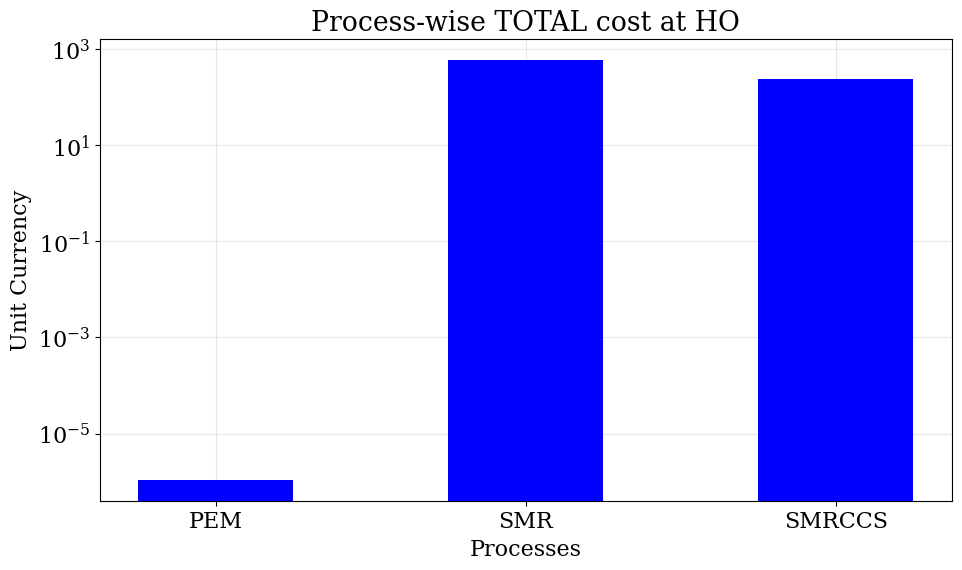

In [635]:
plot_results.cost(results=results_gwp_30, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [636]:
# data = results_gwp_30.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod30.xlsx', index=True)

In [637]:
results_gwp_30.output["objective"]

1070.5530914564556

In [638]:
milp_gwp_40 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_40, network_scale_level = 0, gwp_reduction_pct = 40, gwp = results_cost.output['global_warming_potential_network'][0])


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [639]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_40.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons1.add(expr = milp_gwp_40.P['HO', 'PEM', *i] - milp_gwp_40.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons2.add(expr = milp_gwp_40.P['HO', 'SMR', *i] - milp_gwp_40.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons3.add(expr = milp_gwp_40.P['HO', 'SMRCCS', *i] - milp_gwp_40.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_40.cons4.add(expr = milp_gwp_40.P['HO', 'SMR', *i] >= 5)

In [640]:
results_gwp_40 = solve(scenario=scenario, instance=milp_gwp_40,
                     solver='gurobi', name=f"res_gwp_40", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0xd574e40c
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1093 rows and 1155 columns
Presolve time: 0.01s
Presolved: 178 rows, 108 columns, 556 nonzeros
Variable types: 106 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1150.8169820

Root relaxation: objective 1.150817e+03, 119 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

In [641]:
results_gwp_40.output['objective']

1150.8169820113478

In [642]:
results_gwp_40.output['global_warming_potential_location']

{('HO', 0): 3594.4166070092997}

In [643]:
results_gwp_40.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 134.98308983440268,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 1985.9593952425776,
 ('HO', 'GridPower', 0): 305.13127691681655,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [644]:
results_gwp_40.output['P_network']

{('Grid', 0): 0.7254321642261817,
 ('PEM', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 288.0806936879005}

In [645]:
results_gwp_40.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.00686579438726953,
 ('HO', 'Grid', 0, 6): 0.01298579438726953,
 ('HO', 'Grid', 0, 7): 0.019105794387269528,
 ('HO', 'Grid', 0, 8): 0.025225794387269528,
 ('HO', 'Grid', 0, 9): 0.031345794387269525,
 ('HO', 'Grid', 0, 10): 0.037465794387269526,
 ('HO', 'Grid', 0, 11): 0.043585794387269526,
 ('HO', 'Grid', 0, 12): 0.04970579438726953,
 ('HO', 'Grid', 0, 13): 0.055825794387269534,
 ('HO', 'Grid', 0, 14): 0.06194579438726952,
 ('HO', 'Grid', 0, 15): 0.06806579438726953,
 ('HO', 'Grid', 0, 16): 0.07418579438726954,
 ('HO', 'Grid', 0, 17): 0.013478947368421049,
 ('HO', 'Grid', 0, 18): 0.019598947368421053,
 ('HO', 'Grid', 0, 19): 0.025718947368421053,
 ('HO', 'Grid', 0, 20): 0.03183894736842106,
 ('HO', 'Grid', 0, 21): 0.03795894736842105,
 ('HO', 'Grid', 0, 22): 0.04407894736842105,
 ('HO', 'Gri

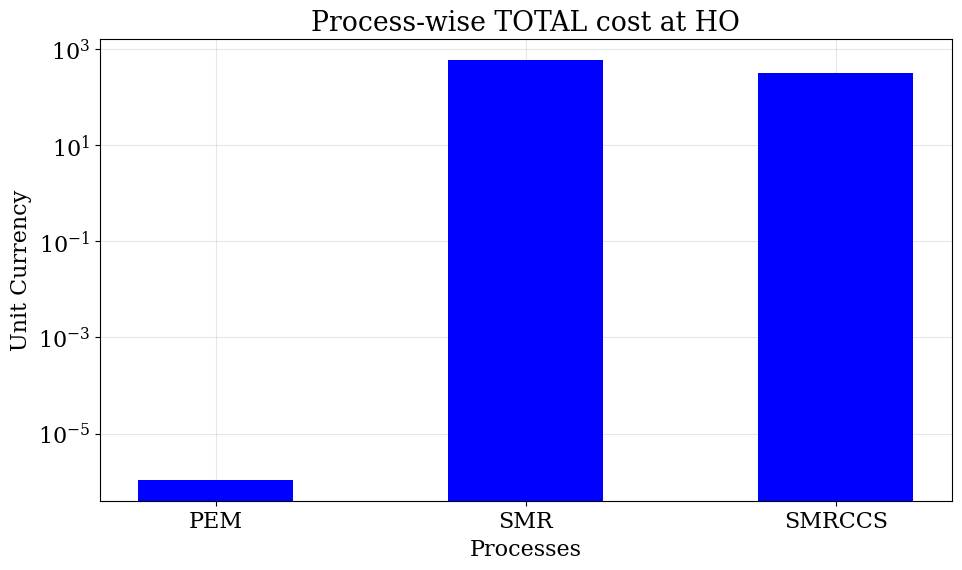

In [646]:
plot_results.cost(results=results_gwp_40, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

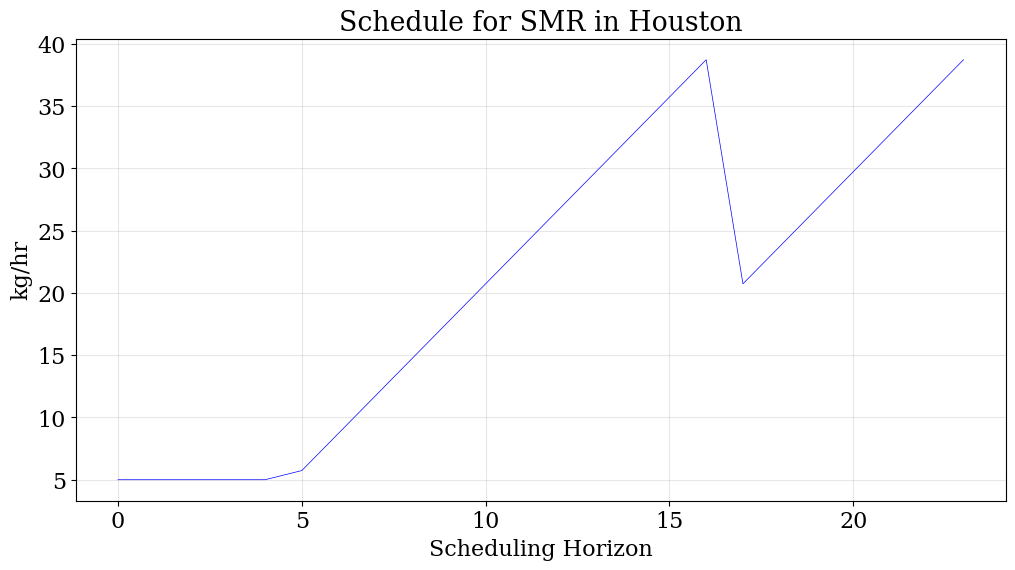

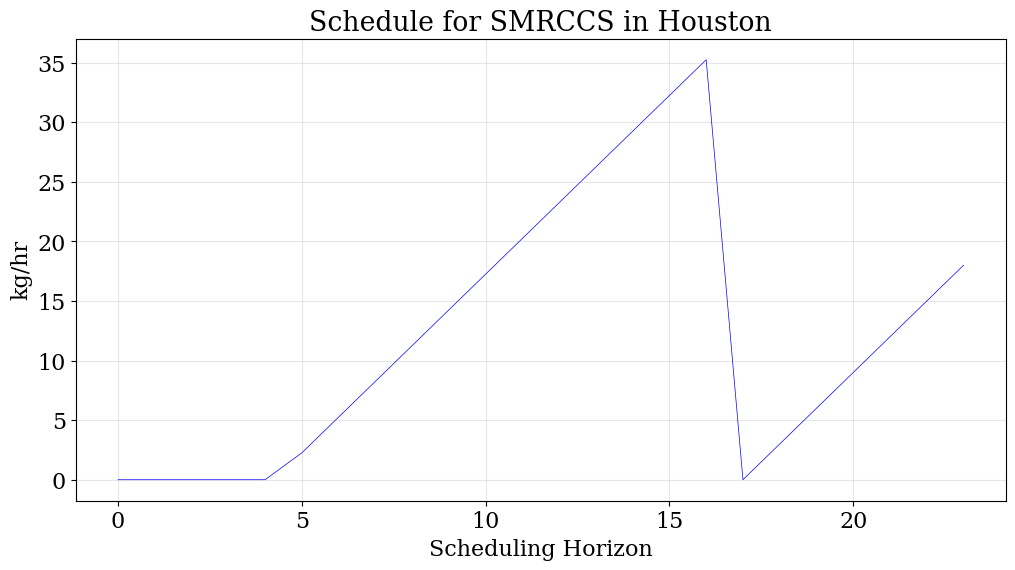

In [647]:
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMRCCS', location='HO')


In [648]:
# data = results_gwp_40.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod40.xlsx', index=True)

In [649]:
results_gwp_40.output["objective"]

1150.8169820113478

In [650]:
milp_gwp_50 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_50, network_scale_level = 0, gwp_reduction_pct = 50, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [651]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_50.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons1.add(expr = milp_gwp_50.P['HO', 'PEM', *i] - milp_gwp_50.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons2.add(expr = milp_gwp_50.P['HO', 'SMR', *i] - milp_gwp_50.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons3.add(expr = milp_gwp_50.P['HO', 'SMRCCS', *i] - milp_gwp_50.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_50.cons4.add(expr = milp_gwp_50.P['HO', 'SMR', *i] >= 5)

In [652]:
results_gwp_50 = solve(scenario=scenario, instance=milp_gwp_50,
                     solver='gurobi', name=f"res_gwp_50", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0x68aaed0a
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1091 rows and 1153 columns
Presolve time: 0.01s
Presolved: 180 rows, 110 columns, 564 nonzeros
Variable types: 108 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1231.1129615

Root relaxation: objective 1.231113e+03, 166 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

In [653]:
# data = results_gwp_50.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod50.xlsx', index=True)

In [654]:
results_gwp_50.output["objective"]

1231.1129615332075

In [655]:
results_gwp_50.output['global_warming_potential_location']

{('HO', 0): 2995.3471725077497}

In [656]:
milp_gwp_60 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_60, network_scale_level = 0, gwp_reduction_pct = 60, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [657]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_60.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons1.add(expr = milp_gwp_60.P['HO', 'PEM', *i] - milp_gwp_60.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons2.add(expr = milp_gwp_60.P['HO', 'SMR', *i] - milp_gwp_60.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons3.add(expr = milp_gwp_60.P['HO', 'SMRCCS', *i] - milp_gwp_60.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_60.cons4.add(expr = milp_gwp_60.P['HO', 'SMR', *i] >= 5)

In [658]:
results_gwp_60 = solve(scenario=scenario, instance=milp_gwp_60,
                     solver='gurobi', name=f"res_gwp_60", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0xb2884029
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1088 rows and 1150 columns
Presolve time: 0.01s
Presolved: 183 rows, 113 columns, 576 nonzeros
Variable types: 111 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1311.4107449

Root relaxation: objective 1.311411e+03, 194 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

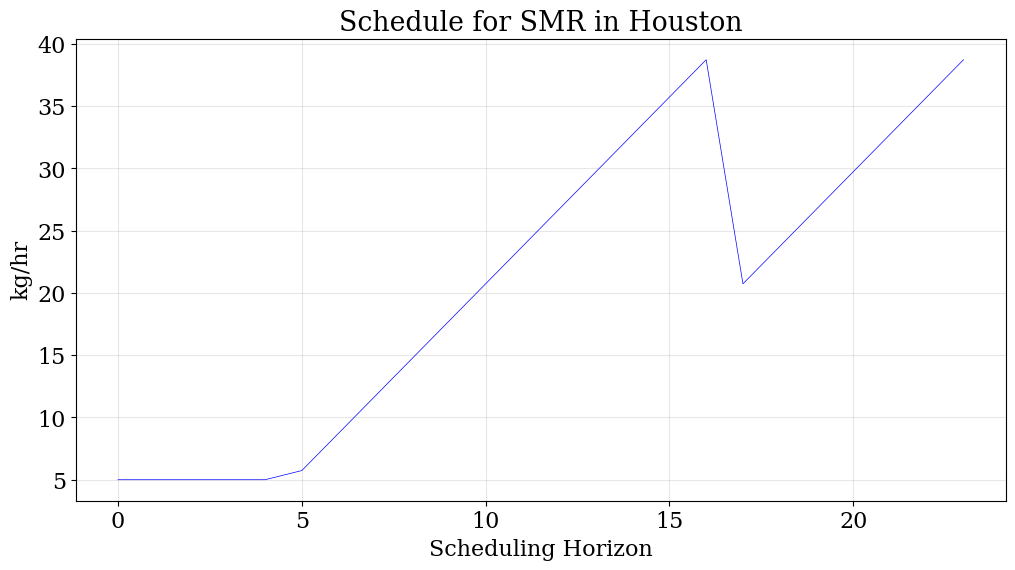

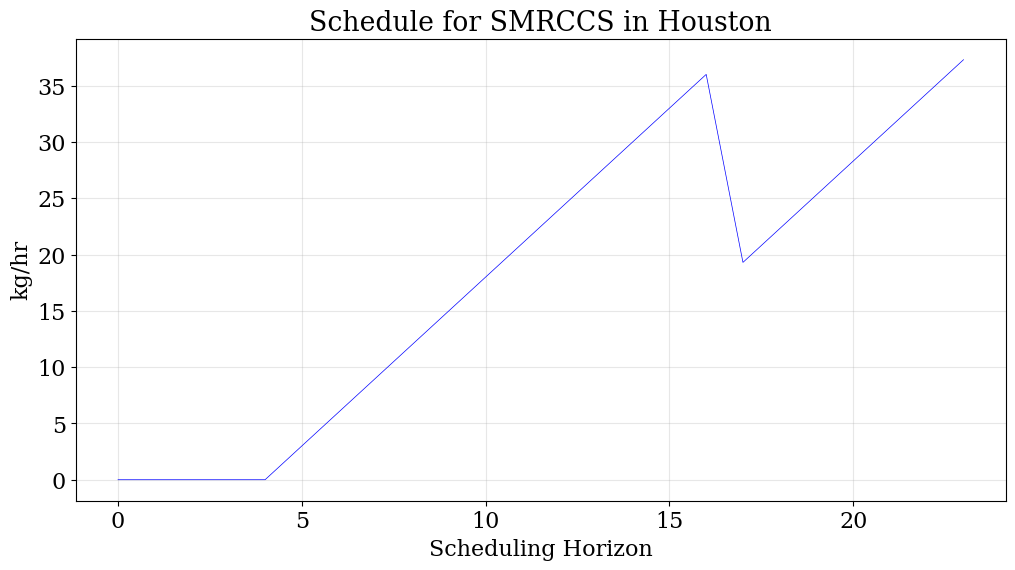

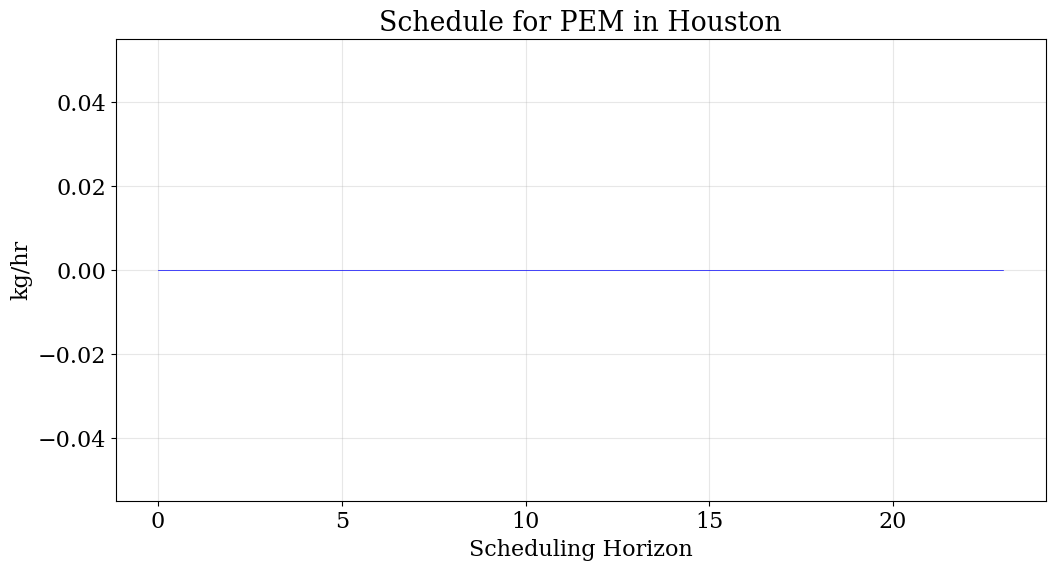

In [659]:
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMRCCS', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'PEM', location='HO')

In [660]:
# data = results_gwp_60.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod60.xlsx', index=True)

In [661]:
results_gwp_60.output["objective"]

1311.4107448842856

In [662]:
results_gwp_60.output["P"]

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.007898947368421052,
 ('HO', 'Grid', 0, 6): 0.014018947368421051,
 ('HO', 'Grid', 0, 7): 0.020138947368421048,
 ('HO', 'Grid', 0, 8): 0.02625894736842105,
 ('HO', 'Grid', 0, 9): 0.03237894736842105,
 ('HO', 'Grid', 0, 10): 0.03849894736842105,
 ('HO', 'Grid', 0, 11): 0.04461894736842105,
 ('HO', 'Grid', 0, 12): 0.05073894736842105,
 ('HO', 'Grid', 0, 13): 0.05685894736842105,
 ('HO', 'Grid', 0, 14): 0.06297894736842105,
 ('HO', 'Grid', 0, 15): 0.06909894736842105,
 ('HO', 'Grid', 0, 16): 0.07521894736842105,
 ('HO', 'Grid', 0, 17): 0.04031012541688847,
 ('HO', 'Grid', 0, 18): 0.04643012541688847,
 ('HO', 'Grid', 0, 19): 0.052550125416888464,
 ('HO', 'Grid', 0, 20): 0.05867012541688848,
 ('HO', 'Grid', 0, 21): 0.06479012541688847,
 ('HO', 'Grid', 0, 22): 0.07091012541688849,
 ('HO', 'Grid', 0

In [663]:
results_gwp_60.output['global_warming_potential_location']

{('HO', 0): 2396.2777380062}

In [664]:
results_gwp_60.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 202.4746347516038,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 636.1140928638706,
 ('HO', 'GridPower', 0): 389.34616537522453,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0}

In [665]:
milp_gwp_70 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_70, network_scale_level = 0, gwp_reduction_pct = 70, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [666]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_70.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons1.add(expr = milp_gwp_70.P['HO', 'PEM', *i] - milp_gwp_70.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons2.add(expr = milp_gwp_70.P['HO', 'SMR', *i] - milp_gwp_70.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons3.add(expr = milp_gwp_70.P['HO', 'SMRCCS', *i] - milp_gwp_70.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_70.cons4.add(expr = milp_gwp_70.P['HO', 'SMR', *i] >= 5)

In [667]:
results_gwp_70 = solve(scenario=scenario, instance=milp_gwp_70,
                     solver='gurobi', name=f"res_gwp_70", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1271 rows, 1263 columns and 3231 nonzeros
Model fingerprint: 0xc65381b8
Variable types: 1259 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e-04, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1083 rows and 1145 columns
Presolve time: 0.01s
Presolved: 188 rows, 118 columns, 596 nonzeros
Variable types: 116 continuous, 2 integer (2 binary)

Root relaxation: infeasible, 285 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 infeasible    0               - i

In [668]:
# data = results_gwp_70.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod70.xlsx', index=True)

In [669]:
results_gwp_70.output["objective"]

KeyError: 'objective'

In [ ]:
results_gwp_70.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 213.51257756268458,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 415.35288092642696,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155386,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [ ]:
results_gwp_70.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [ ]:
results_gwp_70.output['global_warming_potential_location']

{('HO', 0): 1797.20830350465}

In [ ]:
milp_gwp_75 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_75, network_scale_level = 0, gwp_reduction_pct = 75, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_75.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons1.add(expr = milp_gwp_75.P['HO', 'PEM', *i] - milp_gwp_75.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons2.add(expr = milp_gwp_75.P['HO', 'SMR', *i] - milp_gwp_75.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons3.add(expr = milp_gwp_75.P['HO', 'SMRCCS', *i] - milp_gwp_75.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_75.cons4.add(expr = milp_gwp_75.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_75 = solve(scenario=scenario, instance=milp_gwp_75,
                     solver='gurobi', name=f"res_gwp_75", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x6cd8582c
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1377 rows and 1396 columns
Presolve time: 0.01s
Presolved: 196 rows, 131 columns, 632 nonzeros
Variable types: 129 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1419.7103336

Root relaxation: objective 1.419710e+03, 114 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

In [ ]:
# data = results_gwp_75.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod75.xlsx', index=True)

In [ ]:
results_gwp_75.output["objective"]

1419.7103336007438

In [ ]:
results_gwp_75.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [ ]:
results_gwp_75.output['global_warming_potential_location']

{('HO', 0): 1497.6735862538749}

In [ ]:
milp_gwp_78 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_78, network_scale_level = 0, gwp_reduction_pct = 78, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_78.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons1.add(expr = milp_gwp_78.P['HO', 'PEM', *i] - milp_gwp_78.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons2.add(expr = milp_gwp_78.P['HO', 'SMR', *i] - milp_gwp_78.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons3.add(expr = milp_gwp_78.P['HO', 'SMRCCS', *i] - milp_gwp_78.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_78.cons4.add(expr = milp_gwp_78.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_78 = solve(scenario=scenario, instance=milp_gwp_78,
                     solver='gurobi', name=f"res_gwp_78", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xde4c7930
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1379 rows and 1398 columns
Presolve time: 0.00s
Presolved: 194 rows, 129 columns, 604 nonzeros
Variable types: 128 continuous, 1 integer (1 binary)
Found heuristic solution: objective 1738.2061409

Root relaxation: cutoff, 124 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

 

In [ ]:
results_gwp_78.output['objective']

1738.2061408926668

In [ ]:
results_gwp_78.output['global_warming_potential_location']

{('HO', 0): 1317.9527559034098}

In [ ]:
results_gwp_78.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 2.5152309419510366,
 ('HO', 'PEM', 0, 8): 2.5152309419510366,
 ('HO', 'PEM', 0, 9): 2.5152309419510366,

In [ ]:
# data = results_gwp_78.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod78.xlsx', index=True)

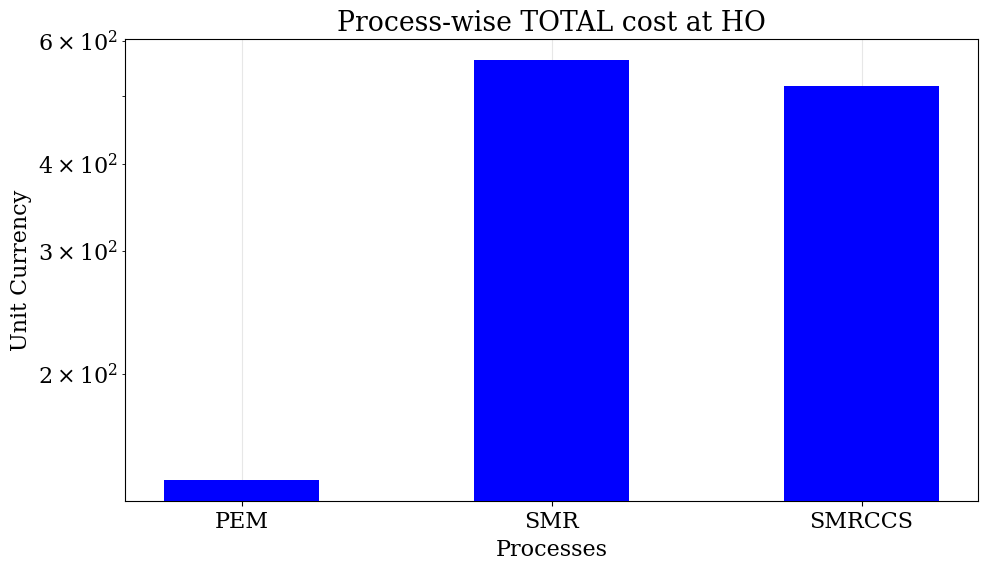

In [ ]:
plot_results.cost(results=results_gwp_78, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
milp_gwp_79 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_79, network_scale_level = 0, gwp_reduction_pct = 79, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_79.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons1.add(expr = milp_gwp_79.P['HO', 'PEM', *i] - milp_gwp_79.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons2.add(expr = milp_gwp_79.P['HO', 'SMR', *i] - milp_gwp_79.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons3.add(expr = milp_gwp_79.P['HO', 'SMRCCS', *i] - milp_gwp_79.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_79.cons4.add(expr = milp_gwp_79.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_79 = solve(scenario=scenario, instance=milp_gwp_79,
                     solver='gurobi', name=f"res_gwp_79", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x306afe49
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1379 rows and 1398 columns
Presolve time: 0.01s
Presolved: 194 rows, 129 columns, 604 nonzeros
Variable types: 128 continuous, 1 integer (1 binary)
Found heuristic solution: objective 1954.6227764

Root relaxation: cutoff, 124 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

 

In [ ]:
results_gwp_79.output['objective']

1954.6227763955399

In [ ]:
results_gwp_79.output['global_warming_potential_location']

{('HO', 0): 1258.0458124532547}

In [ ]:
results_gwp_79.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 3.0,
 ('HO', 'PEM', 0, 8): 4.412554534593653,
 ('HO', 'PEM', 0, 9): 4.412554534593653,
 ('HO', 'PEM', 0

In [ ]:
milp_gwp_85 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_85, network_scale_level = 0, gwp_reduction_pct = 85, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_85.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons1.add(expr = milp_gwp_85.P['HO', 'PEM', *i] - milp_gwp_85.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons2.add(expr = milp_gwp_85.P['HO', 'SMR', *i] - milp_gwp_85.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons3.add(expr = milp_gwp_85.P['HO', 'SMRCCS', *i] - milp_gwp_85.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_85.cons4.add(expr = milp_gwp_85.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_85 = solve(scenario=scenario, instance=milp_gwp_85,
                     solver='gurobi', name=f"res_gwp_85", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x762a378b
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.01s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 3.253314e+03, 191 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    32

In [ ]:
# data = results_gwp_85.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod85.xlsx', index=True)

In [ ]:
results_gwp_85.output['objective']

3253.3141565775077

In [ ]:
results_gwp_85.output['global_warming_potential_location']

{('HO', 0): 898.604151752325}

In [ ]:
results_gwp_85.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 3.0,
 ('HO', 'PEM', 0, 8): 6.0,
 ('HO', 'PEM', 0, 9): 9.0,
 ('HO', 'PEM', 0, 10): 12.0,
 ('HO', 'PEM', 

In [ ]:
milp_gwp_80 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_80, network_scale_level = 0, gwp_reduction_pct = 80, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_80.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons1.add(expr = milp_gwp_80.P['HO', 'PEM', *i] - milp_gwp_80.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons2.add(expr = milp_gwp_80.P['HO', 'SMR', *i] - milp_gwp_80.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons3.add(expr = milp_gwp_80.P['HO', 'SMRCCS', *i] - milp_gwp_80.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_80.cons4.add(expr = milp_gwp_80.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_80 = solve(scenario=scenario, instance=milp_gwp_80,
                     solver='gurobi', name=f"res_gwp_80", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x349efd25
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.03s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)


c:\Users\marcopdsousa\energiapy\.venv\Lib\site-packages\pyomo\solvers\plugins\solvers\direct_or_persistent_solver.py:229: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  self._add_constraint(con)



Root relaxation: objective 2.171046e+03, 123 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    2171.0462441 2171.04624  0.00%     -    0s

Explored 1 nodes (123 simplex iterations) in 0.12 seconds (0.01 work units)
Thread count was 8 (of 8 available processors)

Solution count 1: 2171.05 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.171046244116e+03, best bound 2.171046244116e+03, gap 0.0000%


In [ ]:
# data = results_gwp_80.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod80.xlsx', index=True)

In [ ]:
results_gwp_80.output['objective']

2171.04624411642

In [ ]:
results_gwp_80.output['global_warming_potential_location']

{('HO', 0): 1198.1388690030997}

In [ ]:
milp_gwp_90 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_90, network_scale_level = 0, gwp_reduction_pct = 90, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_90.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons1.add(expr = milp_gwp_90.P['HO', 'PEM', *i] - milp_gwp_90.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons2.add(expr = milp_gwp_90.P['HO', 'SMR', *i] - milp_gwp_90.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons3.add(expr = milp_gwp_90.P['HO', 'SMRCCS', *i] - milp_gwp_90.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_90.cons4.add(expr = milp_gwp_90.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_90 = solve(scenario=scenario, instance=milp_gwp_90,
                     solver='gurobi', name=f"res_gwp_90", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xbe97e159
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.00s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 4.345967e+03, 158 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    43

In [ ]:
# data = results_gwp_90.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod90.xlsx', index=True)

In [ ]:
results_gwp_90.output['objective']

4345.967410768946

In [ ]:
results_gwp_90.output['global_warming_potential_location']

{('HO', 0): 599.0694345015498}

In [ ]:
results_gwp_90.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 2.8769859982505728,
 ('HO', 'PEM', 0, 6): 5.876985998250573,
 ('HO', 'PEM', 0, 7): 8.876985998250573,
 ('HO', 'PEM', 0, 8): 11.876985998250573,
 ('HO', 'PEM'

In [ ]:
milp_gwp_92 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_92, network_scale_level = 0, gwp_reduction_pct = 92, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_92.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons1.add(expr = milp_gwp_92.P['HO', 'PEM', *i] - milp_gwp_92.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons2.add(expr = milp_gwp_92.P['HO', 'SMR', *i] - milp_gwp_92.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons3.add(expr = milp_gwp_92.P['HO', 'SMRCCS', *i] - milp_gwp_92.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_92.cons4.add(expr = milp_gwp_92.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_92 = solve(scenario=scenario, instance=milp_gwp_92,
                     solver='gurobi', name=f"res_gwp_92", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x73233c71
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.01s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 4.789530e+03, 141 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    47

In [ ]:
results_gwp_92.output['objective']

4789.530120699898

In [ ]:
results_gwp_92.output['global_warming_potential_location']

{('HO', 0): 479.2555476012397}

In [ ]:
results_gwp_92.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 2.936533937963761,
 ('HO', 'PEM', 0, 5): 5.936533937963761,
 ('HO', 'PEM', 0, 6): 8.93653393796376,
 ('HO', 'PEM', 0, 7): 11.93653393796376,
 ('HO', 'PEM', 0, 8): 14.93653393796376,
 (

In [ ]:
# data = results_gwp_92.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod92.xlsx', index=True)